In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
pd.set_option("display.max_colwidth", 200)
pd.options.display.float_format = '{:,.2f}'.format

# The Colors of The Iconic Dress

## 1. Mô tả dữ liệu: Dữ liệu mô tả

- <span style="font-size:18px;font-family: Times New Roman;">Năm 2015, có một sự kiện thú vị trên nền tảng twitter. Mọi người tranh cãi màu sắc của một bức ảnh về chiếc váy, nhiều người thấy nó màu đen và xanh, những người khác lại thấy nó có màu trắng và vàng. Nhưng thực tế, chiếc váy có màu đen và xanh lam, điều này đã thu hút sự chú ý của các nhà khoa học để hiểu tại sao mọi người lại nhìn thấy nó với màu sắc khác nhau.</span>
- <span style="font-size:18px;font-family: Times New Roman;">Dataset bao gồm các nhận xét màu của bộ váy của những người từ các quốc gia khác nhau.</span>
- <span style="font-size:18px;font-family: Times New Roman;"> Ý nghĩa các trường thuộc tính trong dataset:</span>
    |Trường thuộc tính| Ý nghĩa|
    |:---|:---|
    |**_unit_id**| ID của bình luận|
    |**_created_at**| Thời gian người dùng đăng bình luận|
    |**_id**| Một ID khác|
    |**_started_at**| Thời gian bắt đầu thu thập dữ liệu|
    |**_tainted**| Có bị gây nhiễu hay không|
    |**_channel**| Kênh thu thập dữ liệu|
    |**_trust**| Độ tin cậy của người dùng|
    |**_worker_id**| ID của người dùng|
    |**_country**| Quốc gia của người dùng|
    |**_region**| Vùng của người dùng|
    |**_city**| Thành phố của người dùng|
    |**_ip**| Địa chỉ IP của người dùng|
    |**_color1**| Màu sắc thứ nhất của bộ váy|
    |**_color2**| Màu sắc thứ hai của bộ váy|
    |**_you**| Màu sắc mà người dùng nhìn thấy|
    |**_proccesed_color_combo**| Màu sắc thực tế của bộ váy|
    |**what group**| Nhóm mà người dùng thuộc về|

- <span style="font-size:18px;font-family: Times New Roman;">Dataset được thu thập từ trang web [Kaggle](https://www.kaggle.com/datasets/peacehegemony/the-colors-of-the-iconic-dress)</span>

## 2. Bài toán
- <span style="font-size:18px;font-family: Times New Roman;">Tập dữ liệu này được dùng để khám phá sự thú vị về khoa học màu sắc.</span>
- <span style="font-size:18px;font-family: Times New Roman;">Bài toán: Dự đoán màu sắc thực tế của bộ váy dựa trên màu sắc mà người dùng nhìn thấy.</span>

## 3. EDA (Exploratory Data Analysis)
- <span style="font-size:18px;font-family: Times New Roman;">Đầu tiên, ta sẽ xem qua dữ liệu để hiểu được dữ liệu như thế nào.</span>
- <span style="font-size:18px;font-family: Times New Roman;">Sau đó, ta sẽ xem xét các trường thuộc tính của dữ liệu để hiểu được dữ liệu như thế nào.</span>
- <span style="font-size:18px;font-family: Times New Roman;">Cuối cùng, ta sẽ xem xét các giá trị bị thiếu của dữ liệu để xử lý dữ liệu.</span>

In [11]:
color_df = pd.read_csv('./Hashtag-That-Dress-DFE.csv', encoding='latin1')
color_df.head(5)

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,color1,color2,you,processed_color_combo,what group?
0,683415253,2/27/15 20:01,1578428229,2/27/15 20:00,False,clixsense,0.3333,11477493,IND,2,Hyderabad,182.18.177.222,cyan,brown,I am a Night Owl. I prefer to be awake late at...,brown & cyan,NaN
1,683415253,2/27/15 20:01,1578428232,2/27/15 20:00,False,neodev,0.5556,31353544,VEN,NaN,NaN,190.201.116.194,white,gold,Both of the previous options apply well to who...,white & gold,white group
2,683415253,2/27/15 20:01,1578428236,2/27/15 20:00,False,clixsense,0.2778,29592447,BIH,1,Sarajevo,185.13.242.127,white,gold,Neither of the previous options apply well to ...,white & gold,white group
3,683415253,2/27/15 20:01,1578428308,2/27/15 20:00,False,getpaid,0.3333,30656104,MAR,49,Rabat,41.248.168.7,blue,black,I am a Night Owl. I prefer to be awake late at...,black & blue,blue group
4,683415253,2/27/15 20:01,1578428352,2/27/15 20:00,False,neodev,0.4444,31422367,SRB,0,Belgrade,93.86.138.220,black,blue,I am a Night Owl. I prefer to be awake late at...,black & blue,blue group


### 3.1. Xem qua dữ liệu

In [12]:
print('Số lượng dòng dữ liệu: ', color_df.shape[0])
print('Số lượng cột dữ liệu: ', color_df.shape[1])

Số lượng dòng dữ liệu:  1015
Số lượng cột dữ liệu:  17


### 3.2. Dữ liệu có bị trùng không?

In [13]:
print('Số lượng dòng dữ liệu trùng: ', color_df.duplicated().sum())

Số lượng dòng dữ liệu trùng:  0


### 3.3. Xem xét các trường thuộc tính của dữ liệu

In [14]:
color_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               1015 non-null   int64  
 1   _created_at            1015 non-null   object 
 2   _id                    1015 non-null   int64  
 3   _started_at            1015 non-null   object 
 4   _tainted               1015 non-null   bool   
 5   _channel               1015 non-null   object 
 6   _trust                 1015 non-null   float64
 7   _worker_id             1015 non-null   int64  
 8   _country               1014 non-null   object 
 9   _region                855 non-null    object 
 10  _city                  851 non-null    object 
 11  _ip                    1015 non-null   object 
 12  color1                 1015 non-null   object 
 13  color2                 1015 non-null   object 
 14  you                    1015 non-null   object 
 15  proc

In [18]:
color_df['_tainted'].unique()

array([False])

### 3.4. Tiền xử lí cột `_tainted` và các cột datetime `_created_at` và `_started_at`

In [21]:
# xóa cột `_tainted` vì cột này không có ý nghĩa
color_df.drop('_tainted', axis=1, inplace=True)

In [50]:
# chuyển đổi cột `created_at` và `started_at` thành datetime
color_df['_created_at'] = pd.to_datetime(color_df['_created_at'])
color_df['_started_at'] = pd.to_datetime(color_df['_started_at'])

In [56]:
# xem xét lại các trường thuộc tính của dữ liệu `_created_at` và `_started_at`
color_df[['_created_at', '_started_at']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _created_at  1015 non-null   datetime64[ns]
 1   _started_at  1015 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 16.0 KB


### 3.5. Xem xét các giá trị bị thiếu của dữ liệu

In [22]:
color_df.isna().sum()

_unit_id                   0
_created_at                0
_id                        0
_started_at                0
_channel                   0
_trust                     0
_worker_id                 0
_country                   1
_region                  160
_city                    164
_ip                        0
color1                     0
color2                     0
you                        0
processed_color_combo      0
what group?               89
dtype: int64

### 3.6. Thống kê dữ liệu numerical

In [30]:
numerical_df = color_df[['_trust']]
numerical_df.aggregate([missing_ratio, pd.Series.min, lower_quantile,
                          pd.Series.mean, upper_quantile, pd.Series.max])


,_trust
missing_ratio,0.000000
min,0.055000
lower_quantile,0.243000
mean,0.302558
upper_quantile,0.358300
max,1.000000


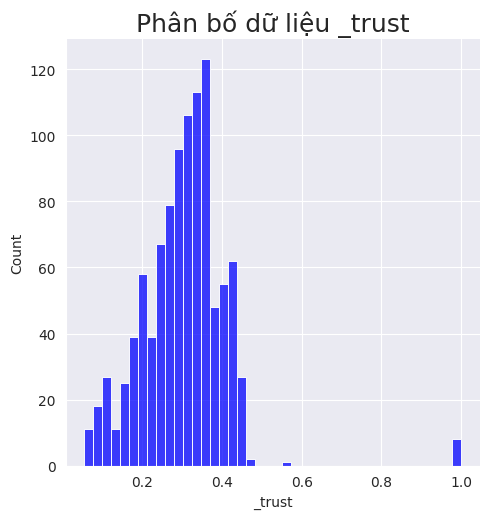

In [40]:
# historical for col _trust
plt.rcParams['figure.figsize'] = (10, 5)
sns.displot(color_df['_trust'], color='blue')
plt.title('Phân bố dữ liệu _trust', fontsize=18)
plt.show();

### 3.7 Thống kê dữ liệu categorical

In [44]:
color_df.columns

Index(['_unit_id', '_created_at', '_id', '_started_at', '_channel', '_trust',
       '_worker_id', '_country', '_region', '_city', '_ip', 'color1', 'color2',
       'you', 'processed_color_combo', 'what group?'],
      dtype='object')

In [48]:
color_df[['_channel', '_country', '_region', '_city', 'color1', 'color2', 'you', 'processed_color_combo', 'what group?']].agg([missing_ratio, pd.Series.nunique, pd.Series.unique])

,_channel,_country,_region,_city,color1,color2,you,processed_color_combo,what group?
missing_ratio,0.0,0.1,15.76,16.16,0.0,0.0,0.0,0.0,8.77
nunique,21,82,134,510,13,13,4,41,2
unique,"[clixsense, neodev, getpaid, gifthunterclub, e...","[IND, VEN, BIH, MAR, SRB, ROU, BRA, ESP, ALB, ...","[2, nan, 1, 49, 0, 14, 60, 51, 42, 3, 28, 4, E...","[Hyderabad, nan, Sarajevo, Rabat, Belgrade, Vi...","[cyan, white, blue, black, gold, gray, violet,...","[brown, gold, black, blue, green, white, yello...",[I am a Night Owl. I prefer to be awake late a...,"[brown & cyan, white & gold, black & blue, blu...","[nan, white group, blue group]"


Xem xét từng giá trị ở cột `you`

In [114]:
color_df['you'].unique()

array(['I am a Night Owl. I prefer to be awake late at night.',
       'Both of the previous options apply well to who I am',
       'Neither of the previous options apply well to who I am',
       'I am a Morning Person. I prefer to be awake early in the morning'],
      dtype=object)

Có thể tóm gọn các giá trị `you` có ý nghĩa như sau:
- `I am a Night Owl. I prefer to be awake late at night.`: `Night Owl`
- `I am a Morning Person. I prefer to be awake early in the morning.`: `Morning Person`
- `Both of the previous options apply well to who I am`: `Both`
- `Neither of the previous options apply well to who I am`: `Neither`

In [115]:
# replace value
color_df['you'] = color_df['you'].replace(['I am a Night Owl. I prefer to be awake late at night.',
                                           'I am a Morning Person. I prefer to be awake early in the morning',
                                           'Both of the previous options apply well to who I am',
                                           'Neither of the previous options apply well to who I am'],
                                          ['Night Owl', 'Morning Person', 'Both', 'Neither'])
color_df['you'].unique()

Chúng ta xem phân bố dữ liệu `color1` và `color2` như thế nào? Nhớ rằng `color1` là màu sắc sáng của bộ váy và `color2` là phần màu sắc đậm của bộ váy.

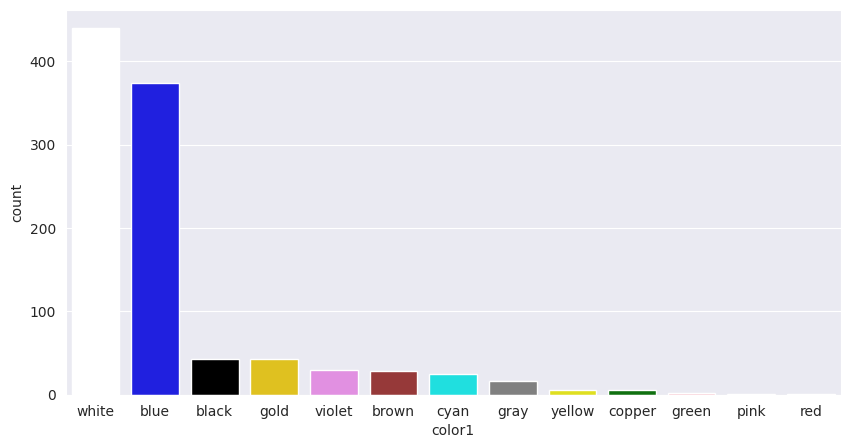

In [106]:
sns.countplot(data=color_df,
              x='color1',
              order=color_df['color1'].value_counts().index,
              palette=['white', 'blue', 'black', 'gold', 'violet', 'brown', 'cyan', 'gray', 'yellow', 'green', 'pink', 'red']);

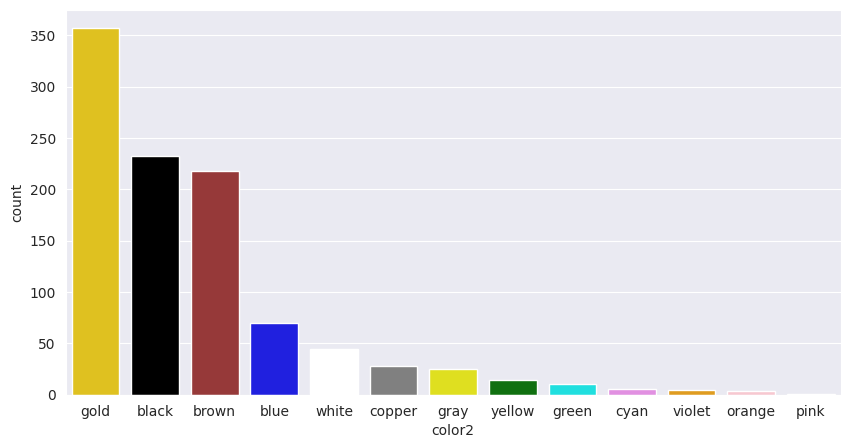

In [110]:
sns.countplot(data=color_df,
              x='color2',
              order=color_df['color2'].value_counts().index,
              palette=['gold', 'black', 'brown', 'blue', 'white', 'gray', 'yellow','green', 'cyan', 'violet', 'orange', 'pink']);

Tiếp đến xem tỉ lệ phân bố dữ liệu `what group?` và `you` như thế nào?

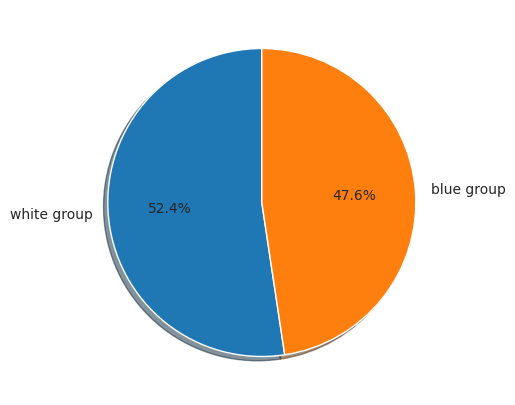

In [111]:
plt.pie(color_df['what group?'].value_counts(),
        labels=color_df['what group?'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

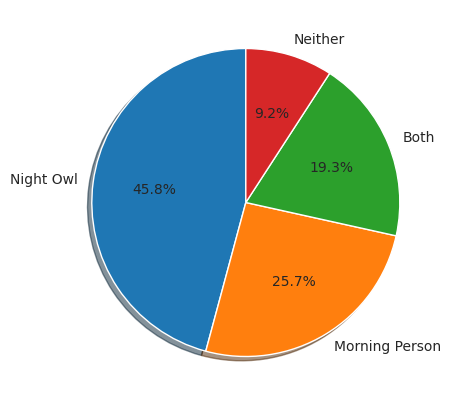

In [118]:
plt.pie(color_df['you'].value_counts(),
        labels=color_df['you'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90);

### 3.8. Phân tích mối quan hệ giữa các biến

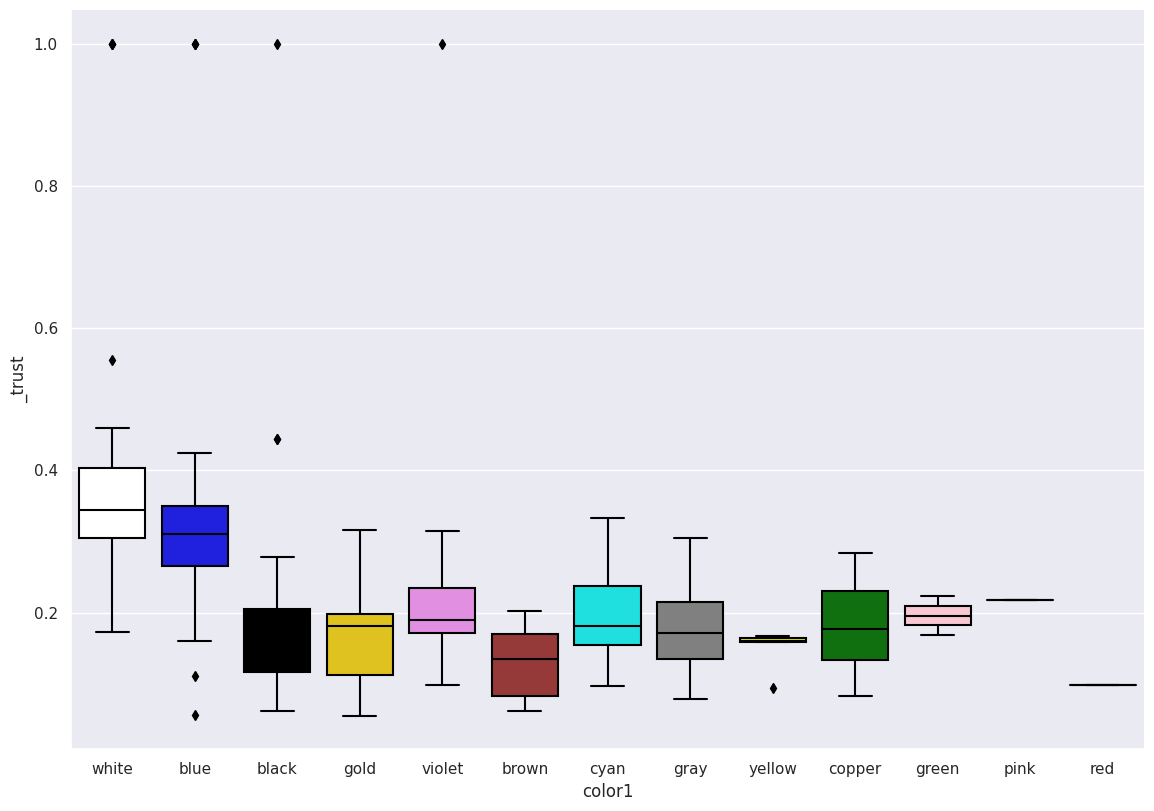

In [139]:
sns.catplot(data=color_df,
            x='color1',
            y='_trust',
            kind='box',
            order=color_df['color1'].value_counts().index,
            palette=['white', 'blue', 'black', 'gold', 'violet', 'brown', 'cyan', 'gray', 'yellow', 'green', 'pink', 'red'],
            height=8.27, aspect=11.7/8.27);

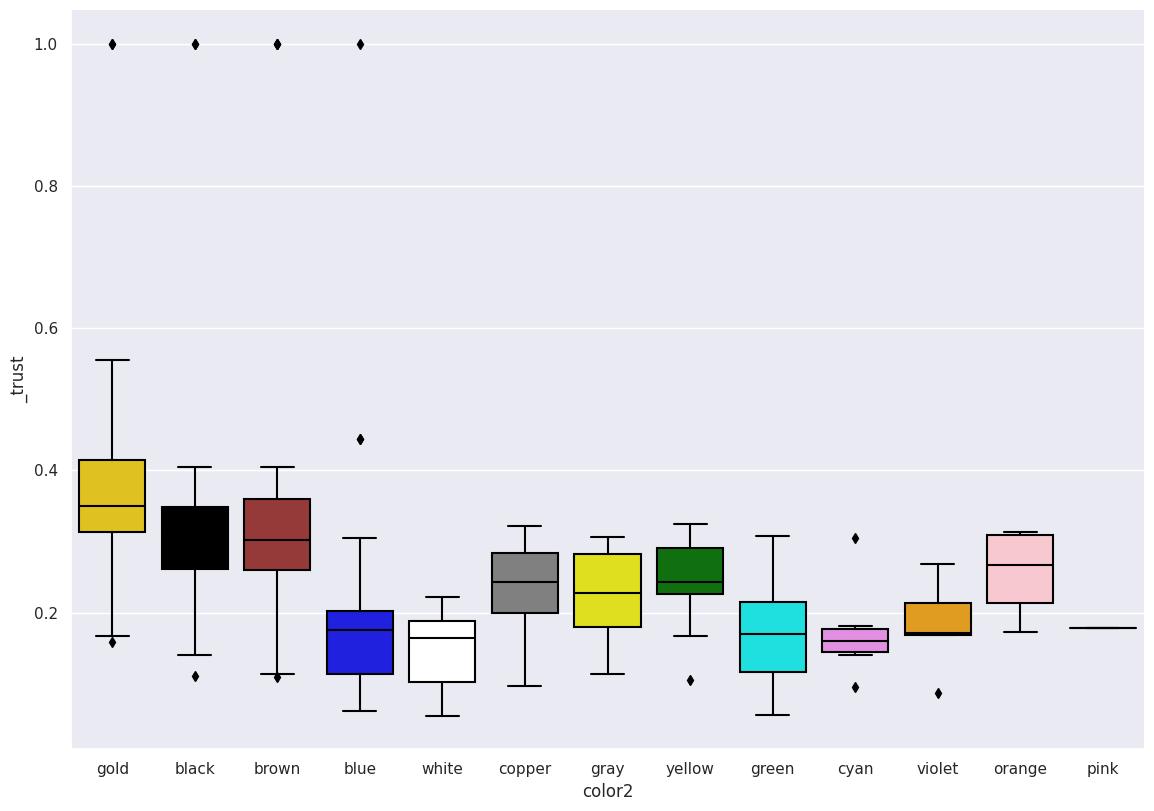

In [141]:
sns.catplot(data=color_df,
            x='color2',
            y='_trust',
            kind='box',
            order=color_df['color2'].value_counts().index,
            palette=['gold', 'black', 'brown', 'blue', 'white', 'gray', 'yellow','green', 'cyan', 'violet', 'orange', 'pink'],
            height=8.27, aspect=11.7/8.27);

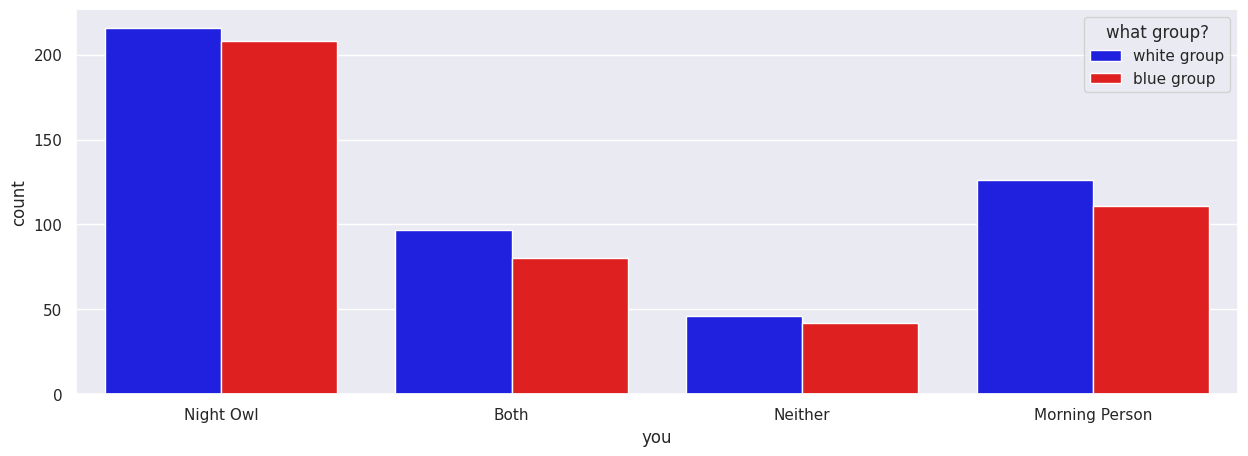

In [145]:
# group by you and what group? and count
plt.rcParams['figure.figsize'] = 15, 5
sns.countplot(data=color_df,
              x='you',
              hue='what group?',
              palette=['blue', 'red']);